# The Battle of the Neighborhoods

## Data

In [1]:
#//////////////////////////////////////////////////////////////////////// IMPORTING LIBRARIES ////////////////////////////////////////////////////////////////////////
!pip install beautifulsoup4
from bs4 import BeautifulSoup                                         # Beautiful Soup Library so format the data.
import requests                                                       # Request Library to retrieve the data from an HTML WebPage.
import pandas as pd                                                   # Pandas Library in order to work with the retrieved Data.
import numpy as np                                                    # Numpy Library in order to work with tuples.
!pip install pgeocode                                                 # pgeocode to search the coordinates given a postal code
import pgeocode
!pip install geopy
!pip install geocoder
from geopy.geocoders import Nominatim                                 # Nominatim library to work with latitudes and longitudes of a given place

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import geocoder
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries installed')
!pip install lxml
#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

     |████████████████████████████████| 122kB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 122kB 8.7MB/s eta 0:00:01
     |████████████████████████████████| 102kB 16.8MB/s ta 0:00:01
     |████████████████████████████████| 92kB 19.3MB/s eta 0:00:01
     |████████████████████████████████| 829kB 22.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB 

In [3]:
#///////////////////////////////////////////////////////////////// RETRIEVING DATA WITH BEAUTIFULSOUP /////////////////////////////////////////////////////////////////

URL = "https://es.wikipedia.org/wiki/Anexo:Distritos_de_Lima"             # Setting URL from Wikipedia.
Wiki_Source = requests.get(URL).text                                      # Requesting Text from the source.
XML_Soup = BeautifulSoup(Wiki_Source, features='html')                    # Parsing the requested text into XML format.
XML_Table = XML_Soup.find('table')                                        # Finding tha Table in the Wikipedia URL.


XML_tittle = XML_Table.find_all('th')                                     # Finding all the Table headers
Tittle_data=[]                                                            # Defining the temporal Row for the headers
for th_cell in XML_Table.find_all('th'):                                  # Iteratinf through all the table headers (Header = th)
    Tittle_data.append(th_cell.text.strip())                              # Setting the headers into the temporal variable
Lima_Districts_df = pd.DataFrame(columns = Tittle_data)                     # Setting the headers into the Districts Dataframe


for tr_cell in XML_Table.find_all('tr'):                                  # Iterating through the table. (Rows = tr)
    row_data=[]                                                           # Setting a temporal variable to store the Row.
    for td_cell in tr_cell.find_all('td'):                                # Iterating through the table. (Column = td)
        row_data.append(td_cell.text.strip())                             # Setting the Row Data.
    if len(row_data)==len(Lima_Districts_df.columns):                     # Stopping the Columns' iteration when it matches with the lenght of columns (3 columns).
        Lima_Districts_df.loc[len(Lima_Districts_df)] = row_data          # Setting the data from the Temporal Row into the Neighborhood Dataframe

        
Lima_Districts_df.head()                                                  # Showing the raw Dataframe

#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Distritos  Ubigeo Área(km²) Población(Censo 2017)  \
0        Ancón  150102    299.22                62 928   
1  Ate Vitarte  150103     77.72               599 196   
2     Barranco  150104      3.33                34 378   
3        Breña  150105      3.22                85 309   
4   Carabayllo  150106    346.88               333 045   

                        Fundación CódigoPostal Ubicación  
0  18741029 29 de octubre de 1874           02            
1     18570102 2 de enero de 1857           03            
2  18741026 26 de octubre de 1874           04            
3    19490715 15 de julio de 1949           05            
4    18210804 4 de agosto de 1821           06

In [8]:
# :::::::::::::::::::::::::::::::::::::::::::::: Defining a function to return the coordinates fro the Districts Dataframe ::::::::::::::::::::::::::::::::::::::::::::::
def get_geocoder(postal_code_from_df):
    geolocator = Nominatim(user_agent="Coordinates")
    location = geolocator.geocode(postal_code_from_df)
    return location.latitude, location.longitude

Lima_Districts_df['Latitude']=''
Lima_Districts_df['Longitude'] = ''

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: Formatting the Dataframe ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

for ind in Lima_Districts_df.index:
    Lima_Districts_df['Latitude'][ind], Lima_Districts_df['Longitude'][ind] = get_geocoder(Lima_Districts_df['Distritos'].iloc[ind] + ', Lima')

try:
    Lima_Districts_df.drop(["Población(Censo 2017)"], axis = 1, inplace = True)
except:
    print("Column previosuly Deleted")
try:
    Lima_Districts_df.drop(["Área(km²)"], axis = 1, inplace = True)
except:
    print("Column previosuly Deleted")
try:
    Lima_Districts_df.drop(["Ubigeo"], axis = 1, inplace = True)
except:
    print("Column previosuly Deleted")
try:
    Lima_Districts_df.drop(["Fundación"], axis = 1, inplace = True)
except:
    print("Column previosuly Deleted")
try:
    Lima_Districts_df.drop(["Ubicación"], axis = 1, inplace = True)
except:
    print("Column previosuly Deleted")

Lima_Districts_df["Distritos"].replace({"Ancón": "Ancon", "Breña": "Brena", "Jesús María": "Jesus Maria", "Lurín": \
                                      "Lurin", "Rímac": "Rimac", "San Martín de Porres": "San Martin de Porres", \
                                      "Santa María del Mar": "Santa Maria del Mar", "Villa María del Triunfo": \
                                      "Villa Maria del Triunfo"}, inplace=True)

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


Lima_Districts_df.head()                        # Showing the formatted Dataframe with the coordinates

Distritos CódigoPostal Latitude Longitude
0                     Ancon           02 -11.6966  -77.1117
1               Ate Vitarte           03 -12.0367  -76.9326
2                  Barranco           04  -12.144  -77.0203
3                     Brena           05 -12.0597  -77.0501
4                Carabayllo           06  -11.795  -76.9893
5                Chaclacayo           08 -11.9757  -76.7699
6                Chorrillos           09 -12.1923   -77.009
7               Cieneguilla           40 -12.0732  -76.7771
8                     Comas           07 -11.9329  -77.0407
9               El Agustino           10 -12.0421  -76.9957
10            Independencia           28 -11.9893  -77.0473
11              Jesus Maria           11 -12.0782  -77.0464
12                La Molina           12 -12.0902  -76.9223
13              La Victoria           13 -12.0734  -77.0164
14                     Lima           01 -12.0621  -77.0365
15                    Lince           14 -12.0866  -77.0366
16               Los Olivos           39  -11.966  -77.0731
17               Lurigancho           15 -11.9488  -76.7627
18                    Lurin           16  -12.238  -76.7839
19        Magdalena del Mar           17 -12.0957  -77.0682
20               Miraflores           18 -12.1215  -77.0259
21               Pachacamac           19 -12.2511  -76.9066
22                 Pucusana           20 -12.4821  -76.7975
23             Pueblo Libre           21 -12.0766  -77.0679
24            Puente Piedra           22 -11.8768  -77.0745
25            Punta Hermosa           24 -12.3327  -76.8257
26              Punta Negra           23 -12.3656  -76.7952
27                    Rimac           25 -12.0203  -77.0355
28              San Bartolo           26 -12.3871  -76.7779
29                San Borja           41 -12.0965  -76.9957
30               San Isidro           27 -12.0979  -77.0354
31   San Juan de Lurigancho           36 -11.9488  -76.9779
32   San Juan de Miraflores           29 -12.1559  -76.9721
33                 San Luis           30 -12.0724  -76.9959
34     San Martin de Porres           31 -11.9868  -77.0977
35               San Miguel           32 -12.0787  -77.0953
36              Santa Anita           43 -12.2234  -76.8477
37      Santa Maria del Mar           37 -12.4014  -76.7755
38               Santa Rosa           38 -12.0359  -77.0866
39        Santiago de Surco           33 -12.1251  -76.9819
40                Surquillo           34 -12.1142  -77.0105
41        Villa El Salvador           42 -12.2135   -76.937
42  Villa Maria del Triunfo           35 -12.1625  -76.9443

In [10]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: CREATING THE CITY MAP WITH ALL DISTRICTS ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

geolocator = Nominatim(user_agent="Coordinates_Lima")
Lima_Location = geolocator.geocode('Lima, Peru')
Lima_Map = folium.Map(location=[Lima_Location.latitude, Lima_Location.longitude], zoom_start = 10, width=1000, height=700)

for lat, lng, label in zip(Lima_Districts_df['Latitude'], Lima_Districts_df['Longitude'], Lima_Districts_df['Distritos']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Lima_Map)
Lima_Map

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [13]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: SETTING UP FOURSQUARE API ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

CLIENT_ID = 'GST5GRMIRSDY0USVISIBIQ2NKR2XVYTQXVWN3OCFBRYQPXJY' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'UOJEW5ZYRDR3CIRR3IYAPQSWKNEOVZFLLVG1YSTL35MEHH4Z' #'your-client-secret' # your Foursquare Secret
VERSION = '20200618' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


My credentails:
My CLIENT_ID: GST5GRMIRSDY0USVISIBIQ2NKR2XVYTQXVWN3OCFBRYQPXJY
My CLIENT_SECRET:UOJEW5ZYRDR3CIRR3IYAPQSWKNEOVZFLLVG1YSTL35MEHH4Z


In [23]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: DEFINING A FUNCTION TO RETRIEVE ALL NEARBY VENUES ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

LIMIT = 500
def getNearbyVenuesLima(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [24]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: RETRIEVING ALL THENEARBY PLACES IN LIMA DISTRICTS ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Venues_Lima = getNearbyVenuesLima(names = Lima_Districts_df['Distritos'],
                                   latitudes = Lima_Districts_df['Latitude'],
                                   longitudes = Lima_Districts_df['Longitude']
                                  )

Venues_Lima

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [25]:
Venues_Lima

District  Dist_Latitude  Dist_Longitude  \
0                       Ancon     -11.696554      -77.111655   
1                       Ancon     -11.696554      -77.111655   
2                 Ate Vitarte     -12.036748      -76.932624   
3                 Ate Vitarte     -12.036748      -76.932624   
4                 Ate Vitarte     -12.036748      -76.932624   
...                       ...            ...             ...   
3578  Villa Maria del Triunfo     -12.162520      -76.944275   
3579  Villa Maria del Triunfo     -12.162520      -76.944275   
3580  Villa Maria del Triunfo     -12.162520      -76.944275   
3581  Villa Maria del Triunfo     -12.162520      -76.944275   
3582  Villa Maria del Triunfo     -12.162520      -76.944275   

                                Venue  Venue_Lat  Venue_Long  \
0                Variante de Pasamayo -11.729491  -77.169330   
1                         Playa la 18 -11.754307  -77.162556   
2      Gran Mercado Mayorista de Lima -12.039220  -76.945320   
3     Kintaro Restaurant: Sushi & Bar -12.072291  -76.956017   
4             Cevicheria "El Paisita" -12.069259  -76.958881   
...                               ...        ...         ...   
3578                        BarBarian -12.150771  -77.022230   
3579          Belmond Miraflores Park -12.135293  -77.027319   
3580                El Paraíso Marino -12.172692  -77.022899   
3581           Club de Regatas "Lima" -12.166351  -77.032442   
3582            La Sanahoria Barranco -12.141199  -77.023157   

           Venue_Category  
0                   Trail  
1                   Beach  
2           Shopping Mall  
3        Sushi Restaurant  
4     Peruvian Restaurant  
...                   ...  
3578                  Bar  
3579                Hotel  
3580   Seafood Restaurant  
3581          Social Club  
3582      Organic Grocery  

[3583 rows x 7 columns]

In [26]:
# ::::::::::::::::::::::::::::::::::::::::::  A COMPLETE MAP OF LIMA CITY WITH ALLL THE VENUES CATEGORIZED BY COLOR ::::::::::::::::::::::::::::::::::::::::::::::::::::::::

map_venues = folium.Map(location=[-12.04318, -77.02824], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

colors_array = cm.rainbow(np.linspace(0, 1, Lima_Districts_df['Distritos'].count()))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, poi, distr in zip(Venues_Lima['Venue_Lat'], 
                                  Venues_Lima['Venue_Long'], 
                                  Venues_Lima['Venue_Category'], 
                                  Venues_Lima['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Lima_Districts_df[Lima_Districts_df['Distritos'] == distr].index.values.astype(int)[0]],
        fill=True,
        fill_color=rainbow[Lima_Districts_df[Lima_Districts_df['Distritos'] == distr].index.values.astype(int)[0]],
        fill_opacity=0.3).add_to(map_venues)
map_venues

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [177]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: RETRIECING THE TOP 5 VENUES ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Top5_venues_Lima = Venues_Lima['Venue_Category'].value_counts()[0:5].to_frame(name='Count')
Top5_venues_Lima = Top5_venues_Lima.reset_index()
Top5_venues_Lima.rename(index=str, columns={"index": "Venue_Category"}, inplace=True)
Top5_venues_Lima.head()

#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Venue_Category  Count
0                 Park    345
1  Peruvian Restaurant    242
2   Seafood Restaurant    173
3           Restaurant    143
4                Hotel    137

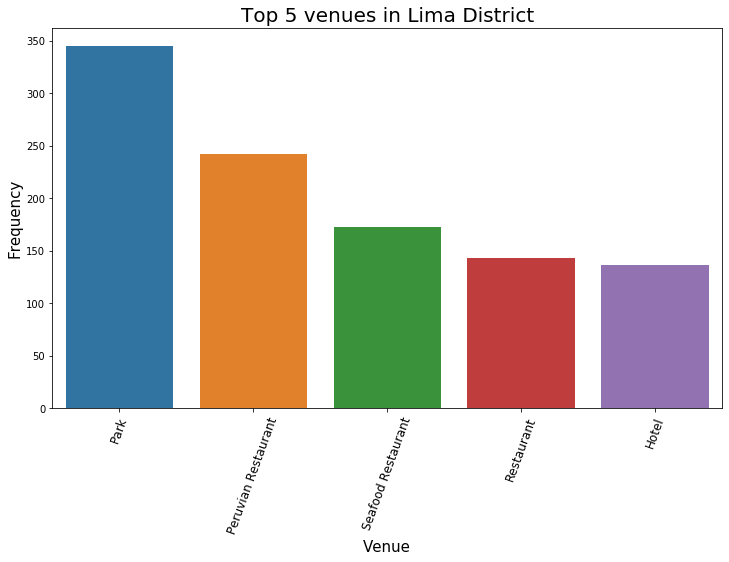

In [248]:
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: DISPLAYING THE TOP 5 VENUES IN A BARPLOT :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

import seaborn as sns
fig = plt.figure(figsize=(12,7))
s=sns.barplot(x="Venue_Category", y="Count", data = Top5_venues_Lima)
s.set_xticklabels(s.get_xticklabels(), rotation = 70, fontsize = 12)
plt.title('Top 5 venues in Lima District', fontsize = 20)
plt.xlabel("Venue", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [249]:
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: DISPLAYING THE RELATIONSHIP BETWEEN VENUES AND DISTRICTS :::::::::::::::::::::::::::::::::::::::::::::::::::

Lima_Venues_onehot = pd.get_dummies(Venues_Lima[['Venue_Category']], prefix="", prefix_sep="")
Lima_Venues_onehot['District'] = Venues_Lima['District'] 
fixed_columns = [Lima_Venues_onehot.columns[-1]] + list(Lima_Venues_onehot.columns[:-1])
Lima_Venues_onehot = Lima_Venues_onehot[fixed_columns]
#Lima_Venues_onehot.head(3)

Venues_Lima_Total = Tokyo_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Venues_Lima_Total.index = np.arange(1, len(Venues_Lima_Total)+1)
Venues_Lima_Total

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

District  Accessories Store   Airport  Airport Lounge  \
1                     Ancon           0.000000  0.000000            0.00   
2               Ate Vitarte           0.000000  0.000000            0.00   
3                  Barranco           0.000000  0.000000            0.00   
4                     Brena           0.000000  0.000000            0.00   
5                Carabayllo           0.000000  0.000000            0.00   
6                Chaclacayo           0.000000  0.000000            0.00   
7                Chorrillos           0.000000  0.000000            0.00   
8               Cieneguilla           0.000000  0.000000            0.00   
9                     Comas           0.000000  0.000000            0.00   
10              El Agustino           0.000000  0.000000            0.00   
11            Independencia           0.000000  0.000000            0.00   
12              Jesus Maria           0.000000  0.000000            0.00   
13                La Molina           0.000000  0.000000            0.00   
14              La Victoria           0.000000  0.000000            0.00   
15                     Lima           0.000000  0.000000            0.00   
16                    Lince           0.000000  0.000000            0.00   
17               Los Olivos           0.000000  0.020000            0.00   
18               Lurigancho           0.000000  0.000000            0.00   
19                    Lurin           0.000000  0.000000            0.00   
20        Magdalena del Mar           0.000000  0.000000            0.00   
21               Miraflores           0.000000  0.000000            0.00   
22               Pachacamac           0.000000  0.000000            0.00   
23                 Pucusana           0.000000  0.000000            0.00   
24             Pueblo Libre           0.000000  0.000000            0.00   
25            Puente Piedra           0.016667  0.000000            0.00   
26            Punta Hermosa           0.000000  0.010000            0.00   
27              Punta Negra           0.000000  0.010753            0.00   
28                    Rimac           0.000000  0.000000            0.00   
29              San Bartolo           0.000000  0.011364            0.00   
30                San Borja           0.000000  0.000000            0.00   
31               San Isidro           0.000000  0.000000            0.00   
32   San Juan de Lurigancho           0.013514  0.000000            0.00   
33   San Juan de Miraflores           0.000000  0.000000            0.00   
34                 San Luis           0.000000  0.000000            0.00   
35     San Martin de Porres           0.000000  0.020000            0.01   
36               San Miguel           0.000000  0.000000            0.00   
37              Santa Anita           0.000000  0.000000            0.00   
38      Santa Maria del Mar           0.000000  0.012346            0.00   
39               Santa Rosa           0.000000  0.010000            0.00   
40        Santiago de Surco           0.000000  0.000000            0.00   
41                Surquillo           0.000000  0.000000            0.00   
42        Villa El Salvador           0.000000  0.000000            0.00   
43  Villa Maria del Triunfo           0.000000  0.000000            0.00   

    American Restaurant  Art Gallery  Art Museum  Asian Restaurant  \
1                  0.00         0.00        0.00          0.000000   
2                  0.00         0.00        0.00          0.000000   
3                  0.00         0.01        0.01          0.000000   
4                  0.00         0.01        0.00          0.010000   
5                  0.00         0.00        0.00          0.000000   
6                  0.00         0.00        0.00          0.000000   
7                  0.00         0.01        0.01          0.000000   
8                  0.00         0.00        0.00          0.000000   
9                  0.01         0.00        

In [189]:
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::: RETRIEVING THE TOP 5 VENUES :::::::::::::::::::::::::::::::::::::::::::::::::::::::

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

Top5_venues_sorted = pd.DataFrame(columns = columns)
Top5_venues_sorted['District'] = Venues_Lima_Total['District']

for ind in np.arange(Venues_Lima_Total.shape[0]):
    Top5_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Venues_Lima_Total.iloc[ind, :], num_top_venues)

Top5_venues_sorted.index = np.arange(1, len(Top5_venues_sorted)+1)
Top5_venues_sorted.head()

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

District 1st Most Common Venue 2nd Most Common Venue  \
1        Ancon                 Trail                 Beach   
2  Ate Vitarte   Peruvian Restaurant      Sushi Restaurant   
3     Barranco                  Park   Peruvian Restaurant   
4        Brena                  Park   Peruvian Restaurant   
5   Carabayllo        History Museum          Neighborhood   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
1           Yoga Studio                 Field            Food Court  
2   Fried Chicken Joint                  Park           Supermarket  
3                Bakery    Seafood Restaurant                 Hotel  
4           Supermarket                Bakery    Seafood Restaurant  
5          Soccer Field   Peruvian Restaurant            Campground

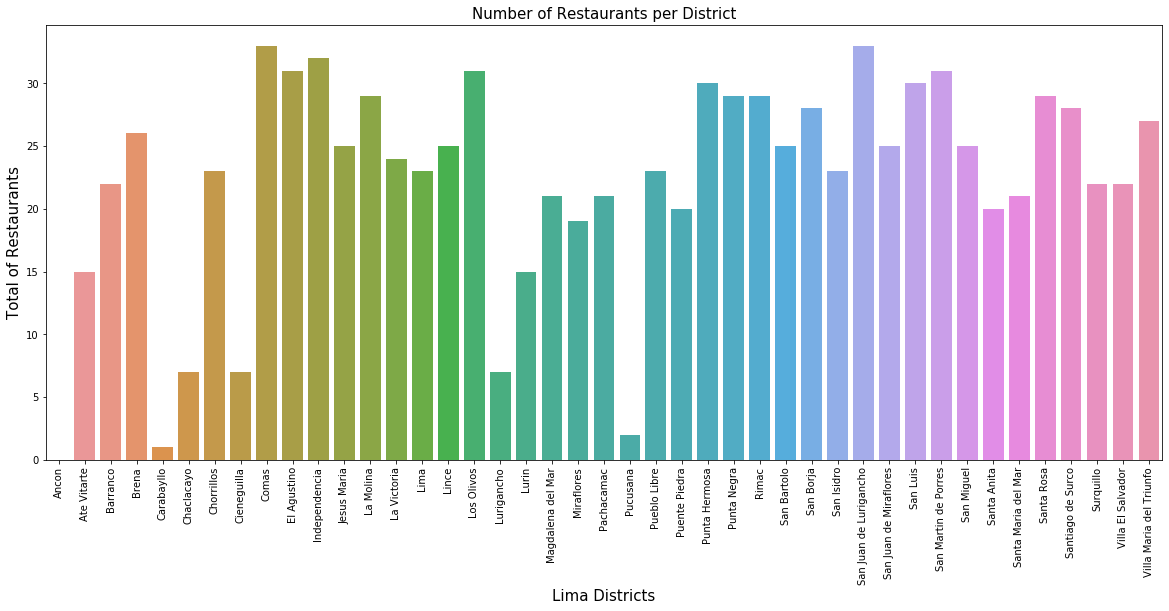

In [196]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::: SHOWING THE NUMBER OF RESTAURANTS PER DISTRICT ::::::::::::::::::::::::::::::::::::::::::::::::::::

Lima_Venues_restaurant = Venues_Lima.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Lima_Venues_restauran_df = Lima_Venues_restaurant.to_frame().reset_index()
Lima_Venues_restauran_df.columns = ['District', 'Number of Restaurant']
Lima_Venues_restauran_df.index = np.arange(1, len(Lima_Venues_restauran_df)+1)
list_rest_no = Lima_Venues_restauran_df['Number of Restaurant'].to_list()
fig = plt.figure(figsize=(20,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=Lima_Venues_restauran_df)

bar.set_ylabel("Total of Restaurants", fontsize=15)
bar.set_xlabel("Lima Districts", fontsize=15)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
bar.set_title("Number of Restaurants per District", fontsize=15)
plt.show()

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [223]:
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::: CLUSTERING DISTRICTS USING K-MEAN ALGORITHM :::::::::::::::::::::::::::::::::::::::::::::::::::::::

kclusters = 3
Lima_grouped_clustering = Venues_Lima_Total.drop('District', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Lima_grouped_clustering)

Top5_venues_sorted['Cluster Label'] = kmeans.labels_

Lima_Cluster_merged = Lima_Districts_df

Lima_Cluster_merged = Top5_venues_sorted.set_index('District').join(Lima_Cluster_merged.set_index('Distritos'))
Lima_Cluster_merged
#Top5_venues_sorted

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Cluster Label 1st Most Common Venue  \
District                                                       
Ancon                                0                 Trail   
Ate Vitarte                          1   Peruvian Restaurant   
Barranco                             1                  Park   
Brena                                1                  Park   
Carabayllo                           1        History Museum   
Chaclacayo                           1                  Park   
Chorrillos                           1                  Park   
Cieneguilla                          1                 Hotel   
Comas                                1            Restaurant   
El Agustino                          1                  Park   
Independencia                        1   Peruvian Restaurant   
Jesus Maria                          1                  Park   
La Molina                            1                  Park   
La Victoria                          1                  Park   
Lima                                 1                  Park   
Lince                                1                  Park   
Los Olivos                           1            Restaurant   
Lurigancho                           1                  Park   
Lurin                                1   Peruvian Restaurant   
Magdalena del Mar                    1                  Park   
Miraflores                           1                  Park   
Pachacamac                           1   Peruvian Restaurant   
Pucusana                             2                 Beach   
Pueblo Libre                         1                  Park   
Puente Piedra                        1            Restaurant   
Punta Hermosa                        2                 Beach   
Punta Negra                          2                 Beach   
Rimac                                1                  Park   
San Bartolo                          2                 Beach   
San Borja                            1                  Park   
San Isidro                           1                  Park   
San Juan de Lurigancho               1            Restaurant   
San Juan de Miraflores               1                  Park   
San Luis                             1                  Park   
San Martin de Porres                 1    Seafood Restaurant   
San Miguel                           1                  Park   
Santa Anita                          1   Peruvian Restaurant   
Santa Maria del Mar                  2                 Beach   
Santa Rosa                           1   Peruvian Restaurant   
Santiago de Surco                    1                  Park   
Surquillo                            1                  Park   
Villa El Salvador                    1   Peruvian Restaurant   
Villa Maria del Triunfo              1                  Park   

                        2nd Most Common Venue 3rd Most Common Venue  \
District                                                              
Ancon                                   Beach           Yoga Studio   
Ate Vitarte                  Sushi Restaurant   Fried Chicken Joint   
Barranco                  Peruvian Restaurant                Bakery   
Brena                     Peruvian Restaurant           Supermarket   
Carabayllo                       Neighborhood          Soccer Field   
Chaclacayo                              Field            Campground   
Chorrillos                Peruvian Restaurant    Seafood Restaurant   
Cieneguilla                        Restaurant   Peruvian Restaurant   
Comas                     Fried Chicken Joint   Peruvian Restaurant   
El Agustino               Peruvian Restaurant                 Hotel   
Independencia                      Restaurant           Coffee Shop   
Jesus Maria               Peruvian Restaurant                 Hotel   
La Molina                    Sushi Restaurant           Supermarket   
La Victoria               Peruvian Restaurant                Bakery   
Lima    

In [224]:
map_clusters = folium.Map(location=[-12.04318, -77.02824], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Lima_Cluster_merged['Latitude'], 
                                  Lima_Cluster_merged['Longitude'], 
                                  Lima_Districts_df['Distritos'], 
                                  Lima_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [245]:

Lima_Cluster1 = Lima_Cluster_merged.loc[Lima_Cluster_merged['Cluster Label'] == 0, 
                                    Lima_Cluster_merged.columns[[1] + list(range(2, Lima_Cluster_merged.shape[1]))]]
Lima_Cluster1

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
District                                                                     
Ancon                    Trail                 Beach           Yoga Studio   

         4th Most Common Venue 5th Most Common Venue CódigoPostal Latitude  \
District                                                                     
Ancon                    Field            Food Court           02 -11.6966   

         Longitude  
District            
Ancon     -77.1117

In [250]:

Lima_Cluster2 = Lima_Cluster_merged.loc[Lima_Cluster_merged['Cluster Label'] == 1, 
                                    Lima_Cluster_merged.columns[[1] + list(range(2, Lima_Cluster_merged.shape[1]))]]
Lima_Cluster2.head()

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
District                                                                        
Ate Vitarte   Peruvian Restaurant      Sushi Restaurant   Fried Chicken Joint   
Barranco                     Park   Peruvian Restaurant                Bakery   
Brena                        Park   Peruvian Restaurant           Supermarket   
Carabayllo         History Museum          Neighborhood          Soccer Field   
Chaclacayo                   Park                 Field            Campground   

            4th Most Common Venue 5th Most Common Venue CódigoPostal Latitude  \
District                                                                        
Ate Vitarte                  Park           Supermarket           03 -12.0367   
Barranco       Seafood Restaurant                 Hotel           04  -12.144   
Brena                      Bakery    Seafood Restaurant           05 -12.0597   
Carabayllo    Peruvian Restaurant            Campground           06  -11.795   
Chaclacayo                 Bakery   Peruvian Restaurant           08 -11.9757   

            Longitude  
District               
Ate Vitarte  -76.9326  
Barranco     -77.0203  
Brena        -77.0501  
Carabayllo   -76.9893  
Chaclacayo   -76.7699

In [247]:

Lima_Cluster3 = Lima_Cluster_merged.loc[Lima_Cluster_merged['Cluster Label'] == 2, 
                                    Lima_Cluster_merged.columns[[1] + list(range(2, Lima_Cluster_merged.shape[1]))]]
Lima_Cluster3

1st Most Common Venue 2nd Most Common Venue  \
District                                                          
Pucusana                            Beach                 Plaza   
Punta Hermosa                       Beach    Seafood Restaurant   
Punta Negra                         Beach    Seafood Restaurant   
San Bartolo                         Beach    Seafood Restaurant   
Santa Maria del Mar                 Beach    Seafood Restaurant   

                    3rd Most Common Venue 4th Most Common Venue  \
District                                                          
Pucusana                       Food Stand         Deli / Bodega   
Punta Hermosa                   Nightclub   Peruvian Restaurant   
Punta Negra                     Nightclub            Restaurant   
San Bartolo                     Nightclub            Restaurant   
Santa Maria del Mar             Nightclub    Italian Restaurant   

                         5th Most Common Venue CódigoPostal Latitude Longitude  
District                                                                        
Pucusana             Cajun / Creole Restaurant           20 -12.4821  -76.7975  
Punta Hermosa                       Restaurant           24 -12.3327  -76.8257  
Punta Negra                Peruvian Restaurant           23 -12.3656  -76.7952  
San Bartolo                        Pizza Place           26 -12.3871  -76.7779  
Santa Maria del Mar                 Restaurant           37 -12.4014  -76.7755